In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
jeju_card_df = pd.read_csv('Downloads/jeju_card.csv')

In [5]:
jeju_card_df.shape

(19573, 11)

In [9]:
jeju_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [10]:
jeju_card_df.describe(include='all')

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
count,19573,19573,19573,19573,19573,19573,19573,19573,19573.000000,19573.000000,1.957300e+04
unique,1,2,2,8,2,7,2,28,NaN,NaN,NaN
top,제주도,제주시,도심,식음료,내국인관광객,50대,남,2017-10,NaN,NaN,NaN
freq,19573,9852,9858,2688,9807,3376,9795,738,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.681347,5980.462525,2.100849e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5331.172895,13623.951410,3.921408e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,371.000000,1.765947e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.000000,1376.000000,7.142090e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.000000,5710.000000,2.169743e+08


In [11]:
jeju_card_df.describe()

,이용자수,이용횟수,이용금액
count,19573.000000,19573.000000,1.957300e+04
mean,2987.681347,5980.462525,2.100849e+08
std,5331.172895,13623.951410,3.921408e+08
min,1.000000,1.000000,1.000000e+03
25%,254.000000,371.000000,1.765947e+07
50%,972.000000,1376.000000,7.142090e+07
75%,3169.000000,5710.000000,2.169743e+08
max,40329.000000,149274.000000,3.213235e+09


In [12]:
object_columns = jeju_card_df.columns[jeju_card_df.dtypes == 'object']

In [17]:
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



In [18]:
jeju_card_df['연도'] = jeju_card_df['연월'].str.split('-').str[0]

In [19]:
jeju_card_df = jeju_card_df[jeju_card_df['연도'] != '2016']

In [20]:
jeju_card_df.shape

(16707, 12)

In [21]:
jeju_card_df.loc[jeju_card_df['연령대'] == '20 미만', '연령대'] = '20대미만'

In [22]:
jeju_card_df['연령대'].unique()

array(['60대이상', '50대', '40대', '30대', '20대미만', '20대'], dtype=object)

In [24]:
jeju_card_df.groupby('연월').sum(numeric_only=True)

,이용자수,이용횟수,이용금액
연월,,,
2017-01,2044697,3962878,158062633602
2017-02,1937989,3686906,142673272629
2017-03,2139087,4265024,158170622304
2017-04,2261037,4428571,164145266282
2017-05,2422539,4744952,174450463090
2017-06,2328383,4606602,166023890619
2017-07,2520117,5048178,177270011408
2017-08,2634037,5212389,178853518885
2017-09,2374142,4765159,168355520204


In [25]:
groupby_ym = jeju_card_df.groupby('연월').sum(numeric_only=True).reset_index()
groupby_ym


,연월,이용자수,이용횟수,이용금액
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


<AxesSubplot:xlabel='연월', ylabel='이용금액'>

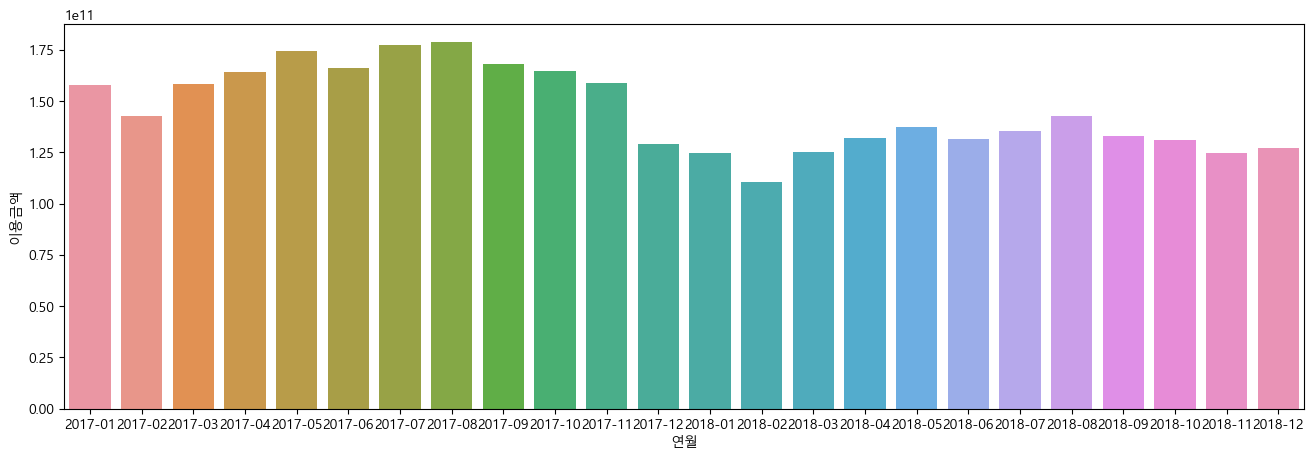

In [36]:
sns.barplot(data=groupby_ym, x='연월', y='이용금액')

In [28]:
#윈도우 기준
plt.rc('font', family='Malgun Gothic')

In [70]:
plt.rcParams['figure.figsize'] = (10, 5)

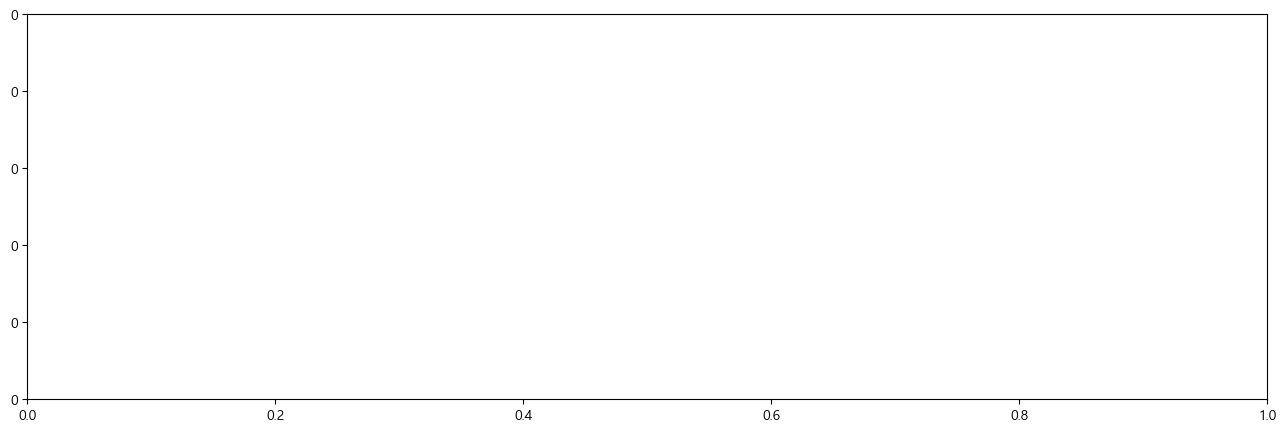

In [37]:
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))

#### 그래프 왼쪽위에 1e11은 10의 11제곱
##### y축의 표기법을 좀 더 이해하기 쉬운 형태로 바꾸자
* plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
* gca()라는 함수를 통해 현재 사용하고 있는 그래프를 불러와서, lambda 함수로 y축의 값의 형식을 정해주고 있다
* x를 1억으로 나눠서, 1억단위로 볼 수 있도록 했다
* : 뒤에는 표기법을 말한다
* ,은 천 단위로 콤마를 찍는 것
* .0f는 소수점ㅈ 아래 숫자가 0개라는 뜻

Text(0, 0.5, '이용금액(억)')

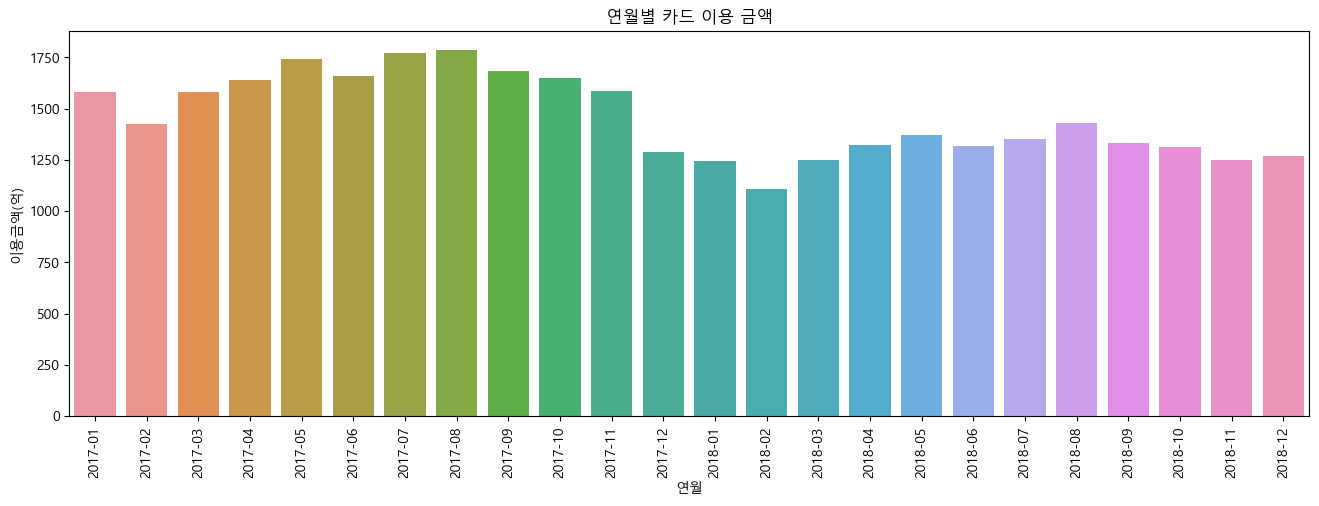

In [45]:
sns.barplot(data=groupby_ym, x='연월', y='이용금액')
plt.xticks(rotation=90)
plt.title('연월별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:.0f}'))
plt.ylabel('이용금액(억)')

In [48]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()
groupby_ym_age

,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대,4800559,9304114,208175160124
1,2017,20대미만,203078,429896,4996657612
2,2017,30대,7080363,13499213,437721213544
3,2017,40대,6965143,14414930,561248406540
4,2017,50대,5158034,10314259,468286978356
5,2017,60대이상,2640430,5069478,260136246561
6,2018,20대,4262563,8714136,175770246392
7,2018,20대미만,216056,475236,5027234286
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


Text(0, 0.5, '이용금액(억)')

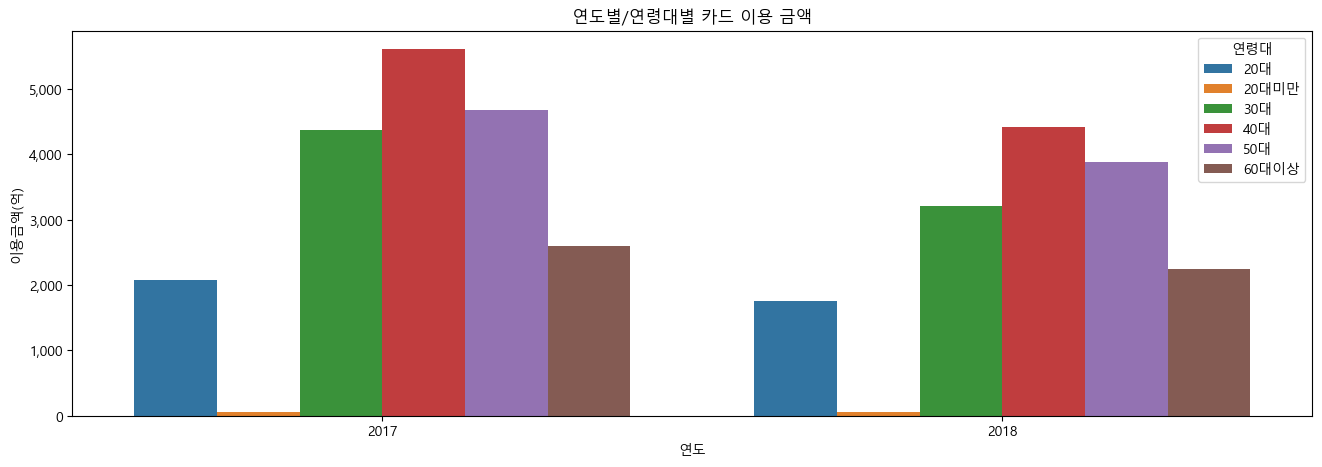

In [60]:
sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [61]:
jeju_card_df['연령대'] = pd.Categorical(jeju_card_df['연령대'],
                                    categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'],
                                    ordered=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20056\645551645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeju_card_df['연령대'] = pd.Categorical(jeju_card_df['연령대'],


Text(0, 0.5, '이용금액(억)')

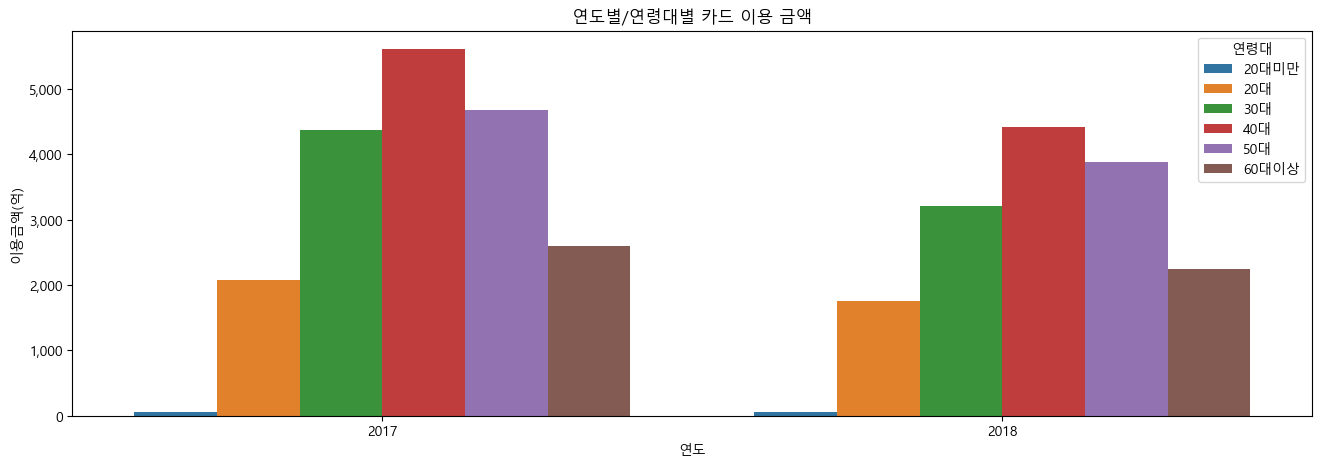

In [62]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [63]:
groupby_ym_user = jeju_card_df.groupby(['연도', '이용자 구분']).sum(numeric_only=True).reset_index()
groupby_ym_user

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,12761026,20113119,754434825907
1,2017,제주도민,14086581,32918771,1186129836830
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


Text(0, 0.5, '이용금액(억)')

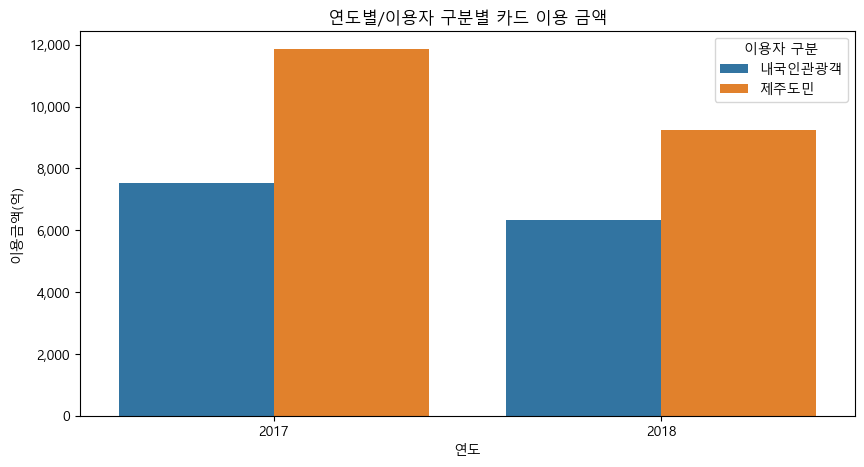

In [74]:
sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [91]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.rcParams['figure.figsize'] = (10, 5)

Text(0, 0.5, '이용금액(억)')

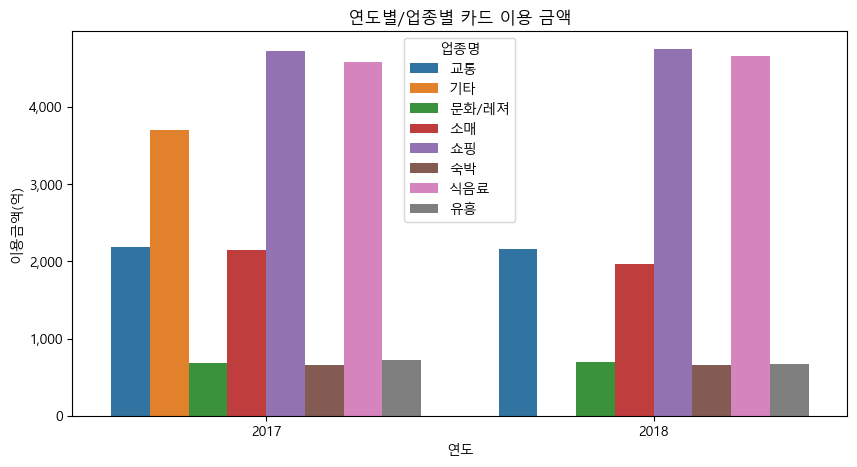

In [75]:
groupby_ym_market = jeju_card_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [76]:
jeju_card_df[jeju_card_df['업종명'] == '기타']['연월'].unique()

array(['2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06',
       '2017-05', '2017-04', '2017-03', '2017-02', '2017-01'],
      dtype=object)

In [77]:
jeju_card_df = jeju_card_df[jeju_card_df['업종명'] != '기타']

Text(0, 0.5, '이용금액(억)')

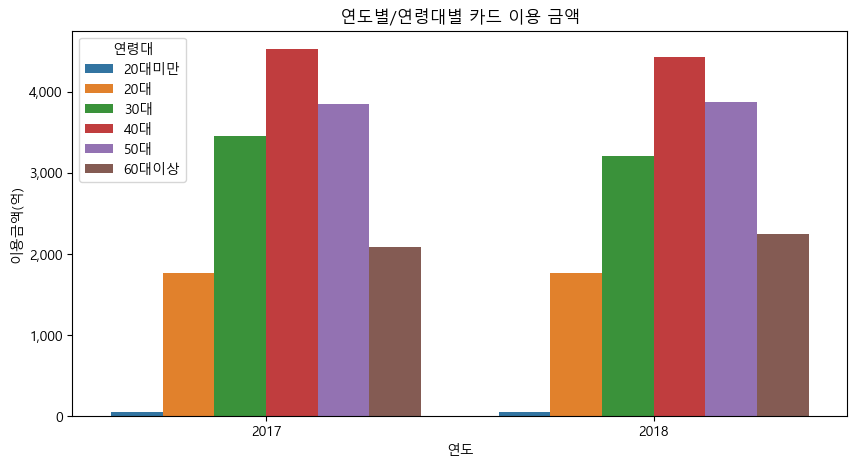

In [78]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [79]:
groupby_age = jeju_card_df.groupby('연령대').sum(numeric_only=True).reset_index()
groupby_age

,연령대,이용자수,이용횟수,이용금액
0,20대미만,401769,879205,9478228519
1,20대,8609569,17330083,352340324557
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


Text(0.5, 1.0, '연령대별 카드 이용자 수 비중')

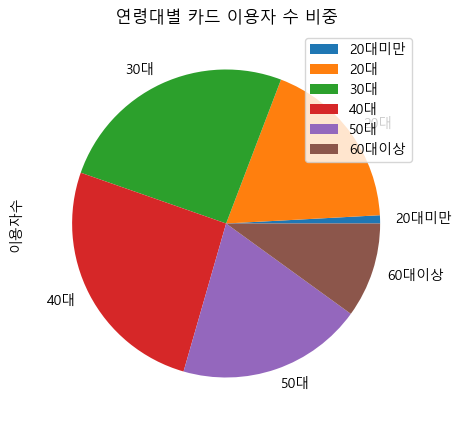

In [80]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'])
plt.title('연령대별 카드 이용자 수 비중')

Text(0.5, 1.0, '연령대별 카드 이용자 수 비중')

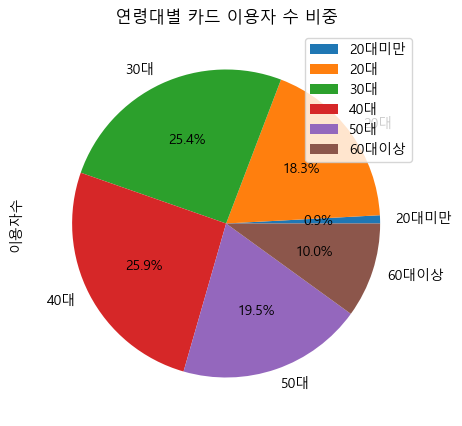

In [84]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용자 수 비중')

In [85]:
#범례부분이 그래프와 겹쳐져있어서 보기가 별로 안 좋다
# 그래프의 왼쪽 아래 좌표를 (0,0)이라 하고
# 파이트의 가로 길이와 세로길이를 각각 1이라고 하면

In [86]:
#(1,1)지점이 범례의 오른쪽 상단 꼭짓점이 된다

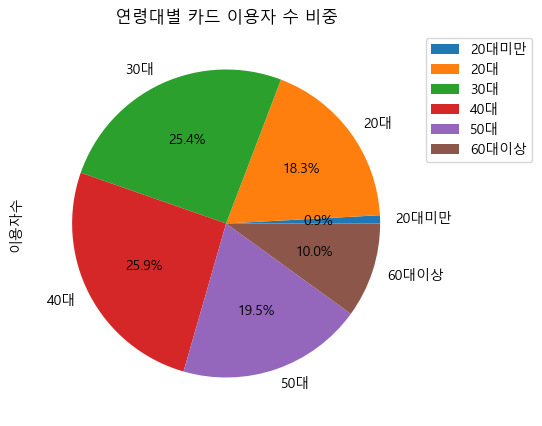

In [96]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용자 수 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [98]:
groupby_age['인당이용금액'] = groupby_age['이용금액'] / groupby_age['이용자수']
groupby_age

,연령대,이용자수,이용횟수,이용금액,인당이용금액
0,20대미만,401769,879205,9478228519,23591.239043
1,20대,8609569,17330083,352340324557,40924.269793
2,30대,11943645,23231348,665648456005,55732.438130
3,40대,12151108,25588896,894568725640,73620.341918
4,50대,9141502,18600897,771684016455,84415.451252
5,60대이상,4683296,9062038,433293299324,92518.879721


Text(0.5, 1.0, '연령대별 인당 카드 이용 금액')

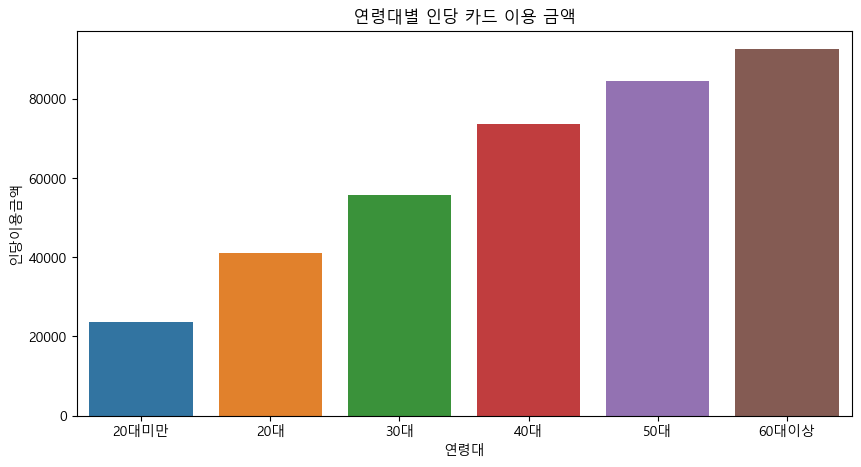

In [99]:
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')

Text(0.5, 1.0, '연령대별 인당 카드 이용 금액')

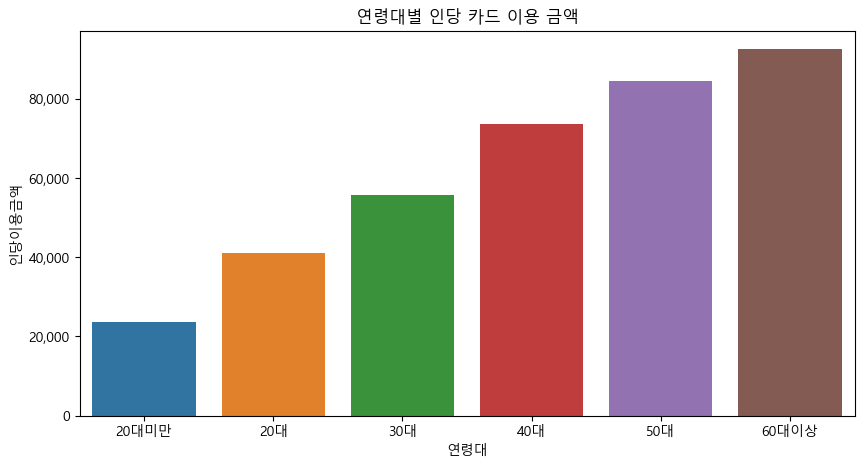

In [100]:
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')

In [102]:
groupby_age_market = jeju_card_df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()
groupby_age_market.head()

,연령대,업종명,이용자수,이용횟수,이용금액
0,20대미만,교통,3740,4705,285316774
1,20대미만,문화/레져,40499,80073,805245645
2,20대미만,소매,56257,77825,1638514065
3,20대미만,쇼핑,164635,453747,3008788954
4,20대미만,숙박,3681,4953,114390996


Text(0, 0.5, '이용금액(억)')

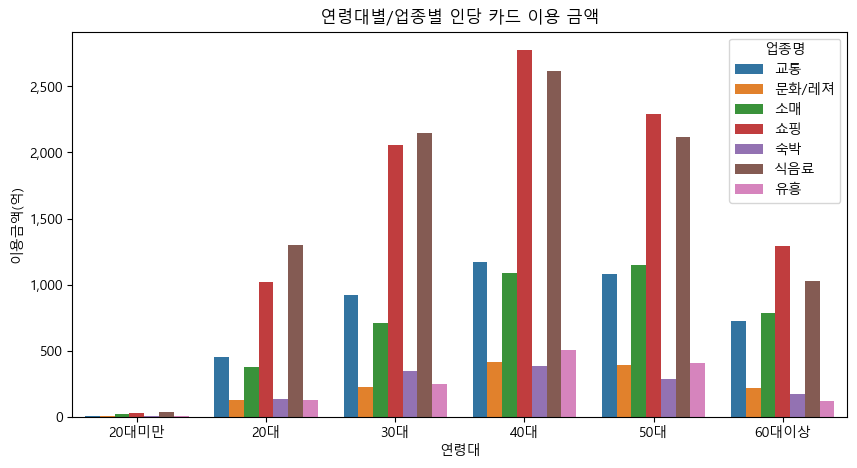

In [103]:
sns.barplot(data=groupby_age_market, x='연령대', y='이용금액', hue='업종명')
plt.title('연령대별/업종별 인당 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0.5, 1.0, '연령대별/업종별 인당 카드 이용 금액')

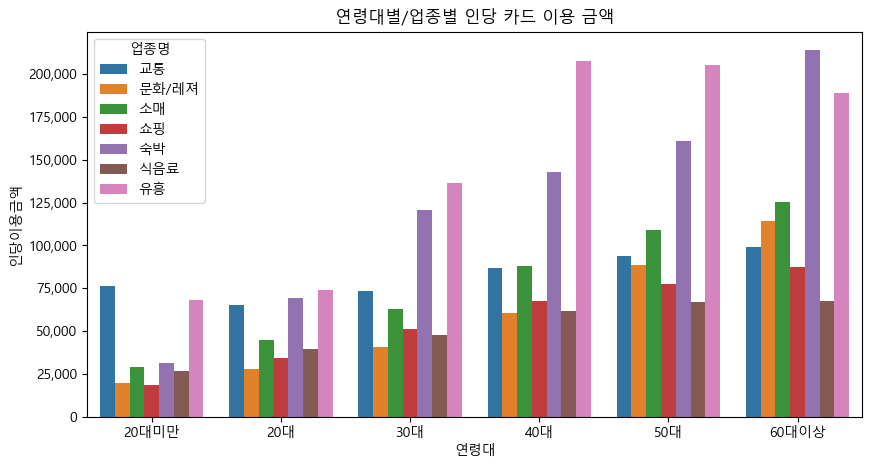

In [104]:
groupby_age_market['인당이용금액'] = groupby_age_market['이용금액'] / groupby_age_market['이용자수']

sns.barplot(data=groupby_age_market, x='연령대', y='인당이용금액', hue='업종명')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('연령대별/업종별 인당 카드 이용 금액')


In [ ]:
#연령대별로 하나씩 그래프를 그려보자
#파이차트를 그려 각 업종이 인당 이용 금액에서 차지하는 비중은 어떤지 확인

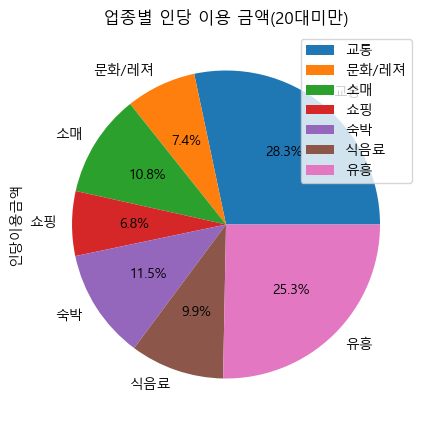

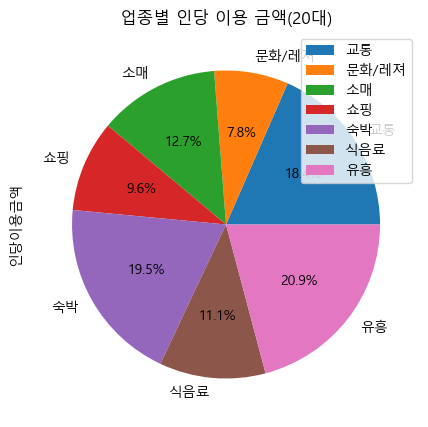

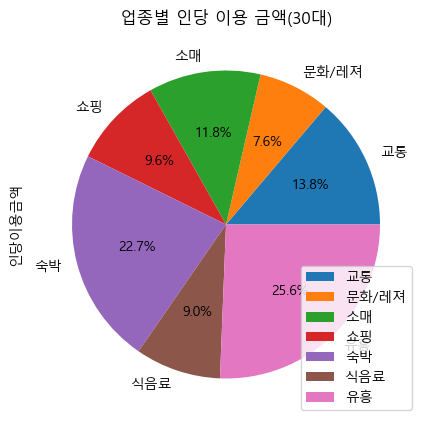

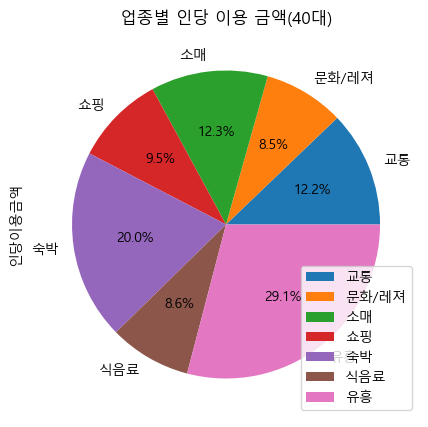

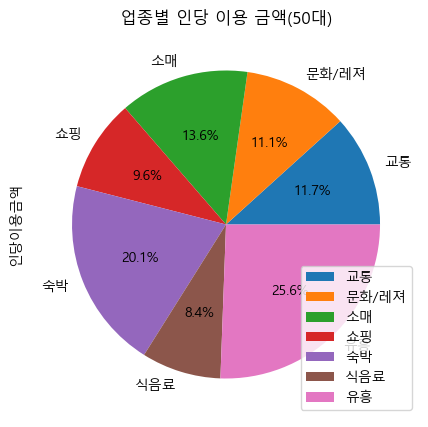

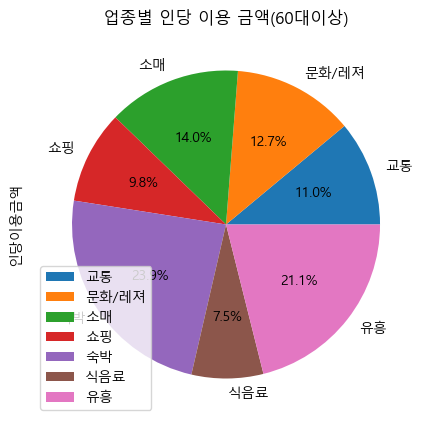

In [117]:
for age in groupby_age_market['연령대'].unique():
    data = groupby_age_market[groupby_age_market['연령대'] == age]
    data.plot(y='인당이용금액', labels=data['업종명'], kind='pie', autopct='%.1f%%')
    plt.title(f'업종별 인당 이용 금액({age})')
    plt.xticks(rotation=90)
    plt.show()

In [115]:
#연령대별로 카드 이용금액이 많아지거나 적어지는지 살펴보자
#groupby를 연령대와 연월 기준으로 하자

['20대미만', '20대', '30대', '40대', '50대', '60대이상']
Categories (6, object): ['20대미만' < '20대' < '30대' < '40대' < '50대' < '60대이상']

<AxesSubplot:xlabel='연령대', ylabel='이용자수'>

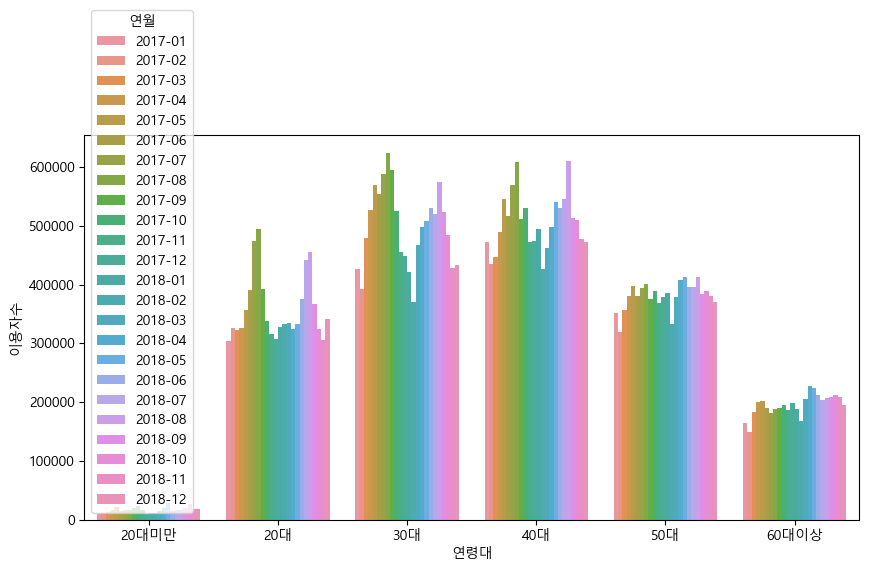

In [118]:
groupby_age_ym = jeju_card_df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()
sns.barplot(data=groupby_age_ym, x='연령대', y='이용자수', hue='연월')

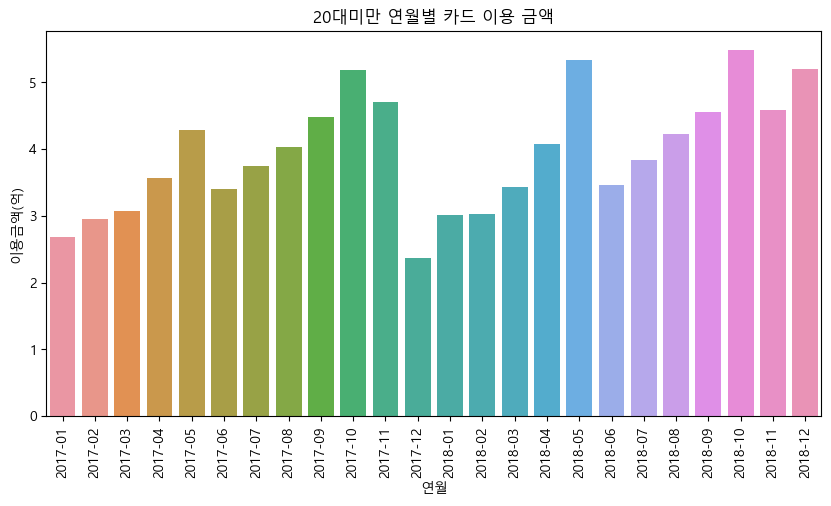

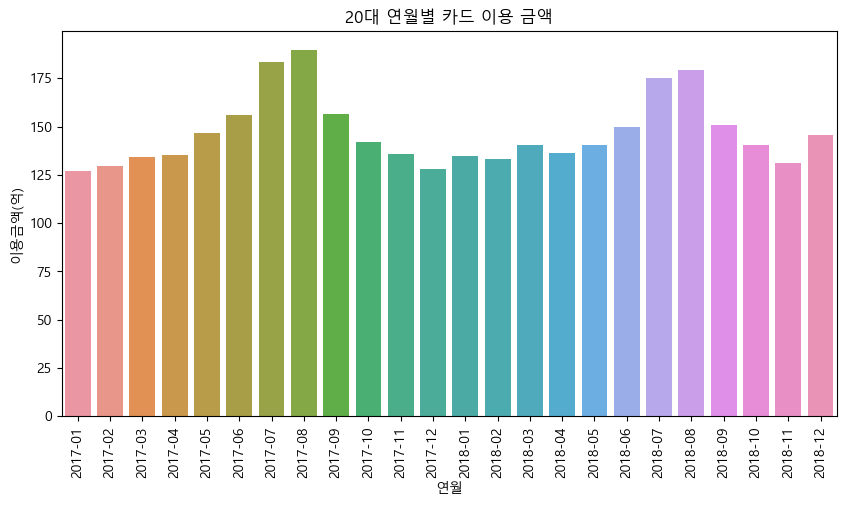

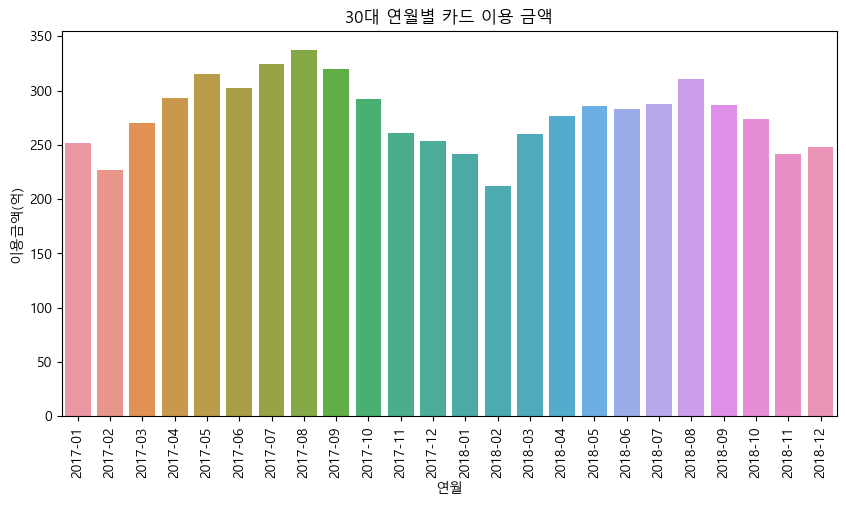

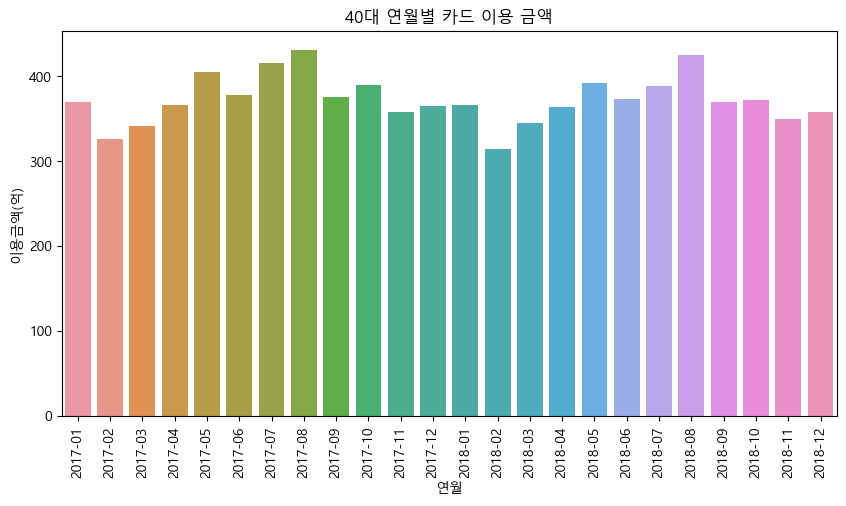

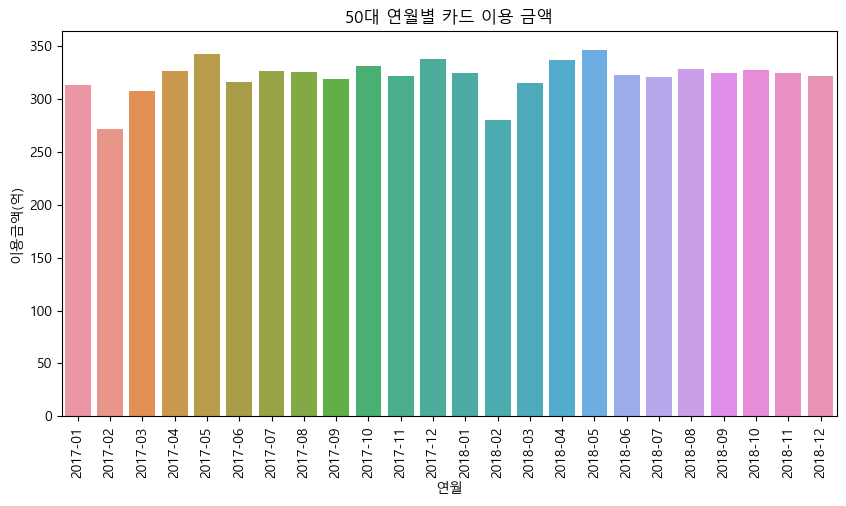

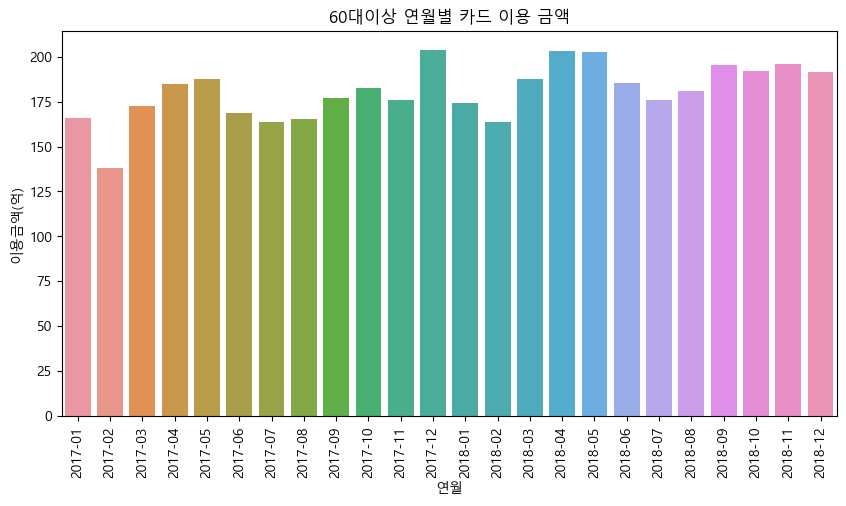

In [119]:
for age in groupby_age_ym['연령대'].unique():
    data = groupby_age_ym[groupby_age_ym['연령대'] == age]
    sns.barplot(data=data, x='연월', y='이용금액')
    plt.title(f'{age} 연월별 카드 이용 금액')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('이용금액(억)')
    plt.show()

In [ ]:
#대부분 여름휴가철에 이용 금액이 집중
#20대는 특히 7~8월에 이용 금액이 가파르게 증가
#20대미만은 5월과 10월에 이용 금액이 가장 많고
#60대이상은 봄과 초겨울에 이용 금액이 더 많다